$$
\def\CC{\bf C}
\def\QQ{\bf Q}
\def\RR{\bf R}
\def\ZZ{\bf Z}
\def\NN{\bf N}
$$
# Demo of EkEkstar -- Milton Minervino -- LaBRI Sage Thursdays -- March 22, 2018

Notes taken by Sébastien Labbé

k-Faces:

In [1]:
from EkEkstar import kFace,kPatch,GeoSub
F1 = kFace((0,0,0),(1,2))
F1

[(0, 0, 0), (1, 2)]

In [2]:
F1.vector()

(0, 0, 0)

In [3]:
F1.type()

(1, 2)

k-Patches are formal sums of k-faces:

In [4]:
F3 = kFace((0,0,0,6,7),(1,4,5,2))
F3

[(0, 0, 0, 6, 7), (1, 4, 5, 2)]

In [6]:
F3 + F1

Patch: 1[(0, 0, 0), (1, 2)] + 1[(0, 0, 0, 6, 7), (1, 2, 4, 5)]

Adding k-faces may cancel depending on their multiplicity and the permutation sign of their type:

In [7]:
F2 = kFace((0,0,0),(2,1))
F2

[(0, 0, 0), (2, 1)]

In [8]:
F1 + F2

Empty patch

Creation of k-Patches:

In [9]:
F1

[(0, 0, 0), (1, 2)]

In [10]:
kPatch([F1,F1])

Patch: 2[(0, 0, 0), (1, 2)]

In [11]:
F1 + F1

Patch: 2[(0, 0, 0), (1, 2)]

In [12]:
F2

[(0, 0, 0), (2, 1)]

In [13]:
kPatch([F2])

Patch: -1[(0, 0, 0), (1, 2)]

BUG:

In [14]:
kFace((0,0,0),(1,2)) + kFace((0,0,1),(3,1)) + kFace((13,23,34),(1,1))

AttributeError: 'kFace' object has no attribute '_faces'

Dual k-faces:

In [15]:
F = kFace((0,0,0,0),(1,3,2))
F+F

Patch: -2[(0, 0, 0, 0), (1, 2, 3)]

In [16]:
F._dual

False

In [18]:
#Fd = F.dual()
Fd = kFace((0,0,0,0),(1,3,2),dual=True)
Fd.is_dual()

True

In [19]:
Fd

[(0, 0, 0, 0), (1, 3, 2)]*

The EkEkStar module generalizes what is already in Sage:

In [20]:
from sage.combinat.e_one_star import Face, Patch, E1Star

Substitutions are already in Sage:

In [21]:
sub = {1:[1,2], 2:[1,3], 3:[1]}
sub[1]

[1, 2]

In [22]:
s = WordMorphism(sub)
s

WordMorphism: 1->12, 2->13, 3->1

In [23]:
s(1)

word: 12

In [24]:
s([2])

word: 13

In [25]:
s([1,1,1,1])

word: 12121212

In [26]:
s([2,1,3])

word: 13121

Iteration of the Tribonacci substitution on letter 1:

In [28]:
s(1,1)

word: 12

In [29]:
s(1,2)

word: 1213

In [30]:
s(1,3)

word: 1213121

In [31]:
s(1,4)

word: 1213121121312

The word 121312112131212131211213 defines a path in \$ZZ^3\$. This can be formalized by a geometric substitution (`GeoSub`). This is useless for 3d-path coded by words since concatenation of words $uv$ is very easy and the geometric position of the start of the word $v$ is simply the end position of the word $u$ seen as a path. But this concatenation rule works only for words and it can't help for applying a substitution on a set of faces. Therefore, we need to consider k-Patches of faces as formal sums.

Here we consider the GeoSub in the easy case of faces of dimension 1 which can be seen just as concatenation of paths:

In [32]:
E1 = GeoSub(sub,1,dual=False)
E1

E_1(1->12, 2->13, 3->1)

In [33]:
P = kPatch([kFace((0,0,0),(1,))])
P

Patch: 1[(0, 0, 0), (1,)]

In [34]:
E1(P)

Patch: 1[(1, 0, 0), (2,)] + 1[(0, 0, 0), (1,)]

In [35]:
E1(P,2)

Patch: 1[(1, 0, 0), (2,)] + 1[(2, 1, 0), (3,)] + 1[(0, 0, 0), (1,)] + 1[(1, 1, 0), (1,)]

In [36]:
E1(P,7)

Patch of 81 faces

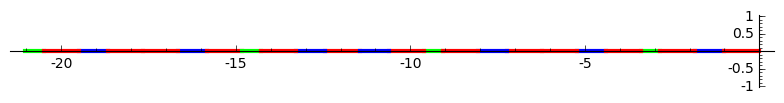

In [37]:
E1(P,5).plot(E1)

Now we consider dual faces which are not segments anymore and for which the formal sums formalism is necessary (this corresponds to the E1star that is already in Sage):

In [38]:
E1star = GeoSub(sub,1,dual=True)
E1star

E*_1(1->12, 2->13, 3->1)

In [39]:
P

Patch: 1[(0, 0, 0), (1,)]

In [41]:
#Pstar = P.dual()
Pstar = kPatch([kFace((0,0,0),(1,),dual=True)])
Pstar

Patch: 1[(0, 0, 0), (1,)]*

In [42]:
E1(P)

Patch: 1[(0, 0, 0), (1,)] + 1[(1, 0, 0), (2,)]

In [43]:
E1star(Pstar)

Patch: 1[(0, 0, 0), (1,)]* + -1[(0, 0, 0), (2,)]* + 1[(0, 0, 0), (3,)]*

In the EkEkstar module, the projection is done in the contracting plane:

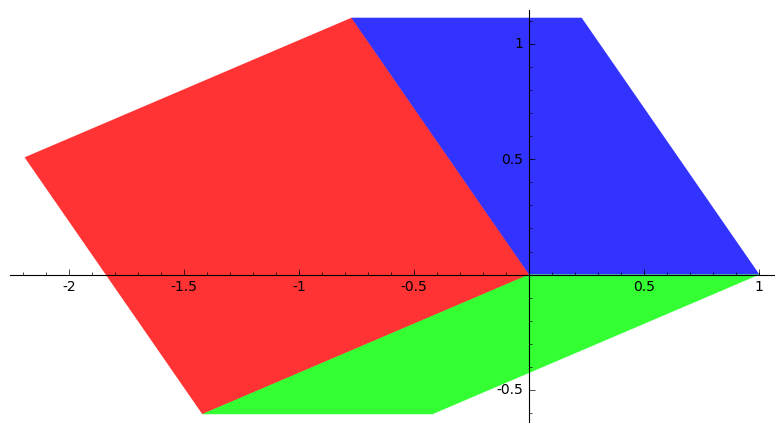

In [44]:
E1star(Pstar).plot(E1star)

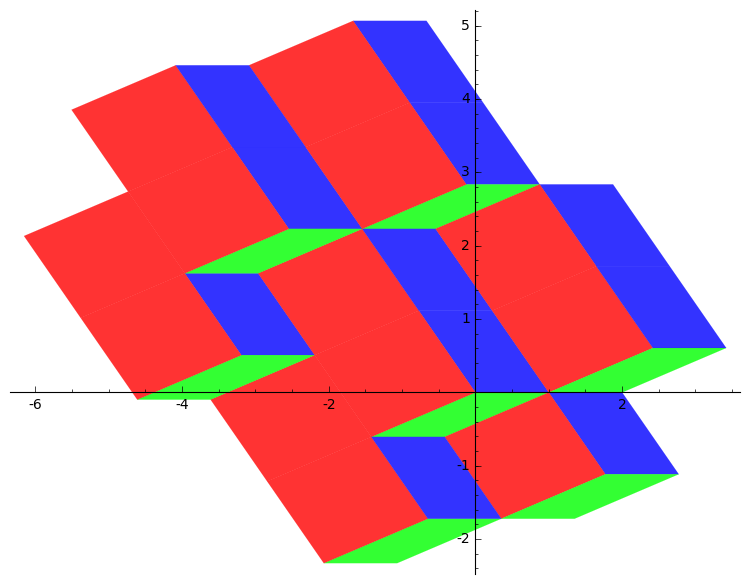

In [45]:
E1star(Pstar,5).plot(E1star)

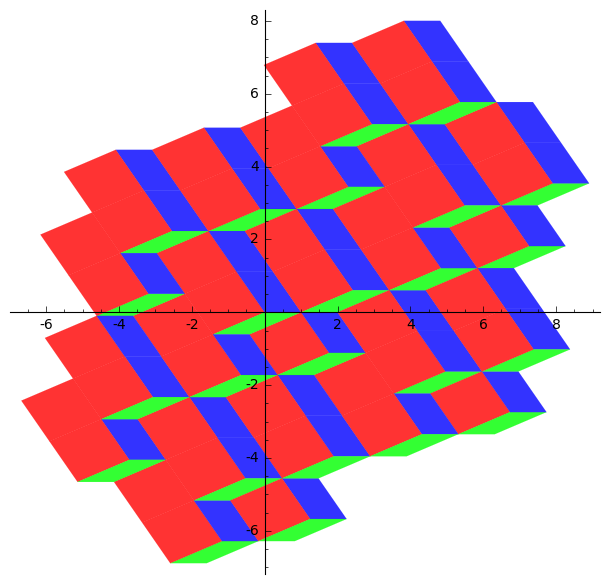

In [46]:
E1star(Pstar,7).plot(E1star)

The module allows more general geometric substitution like \$E\_2^\*\$ which computes the boundary of the fractal:

In [47]:
E2star = GeoSub(sub,2,dual=True)
E2star

E*_2(1->12, 2->13, 3->1)

In [48]:
E2star.base_iter()

{(1, 2): [[(0, 0, 0), (1,)],
  [(0, 0, 0), (2,)],
  [(0, 0, 0), (3,)],
  [(0, 0, -1), (1, 1)],
  [(0, 0, -1), (2, 1)],
  [(0, 0, -1), (3, 1)]],
 (1, 3): [[(0, 0, 0), (1,)],
  [(0, 0, 0), (2,)],
  [(0, 0, 0), (3,)],
  [(0, 0, -1), (1, 2)],
  [(0, 0, -1), (2, 2)],
  [(0, 0, -1), (3, 2)]],
 (2, 3): [[(0, 0, -1), (1,)], [(0, 0, -2), (1, 2)]]}

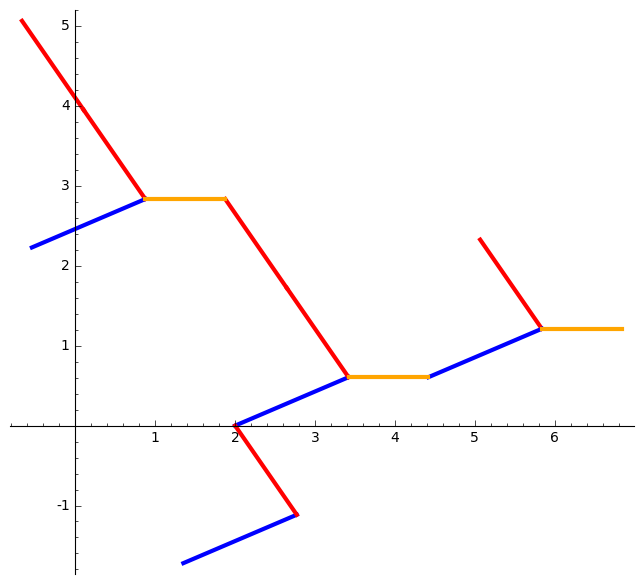

In [49]:
P = kPatch([kFace((0,0,0),(1,2),dual=True)])
E2star(P,6).plot(E2star)